In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.metrics import mean_squared_error,make_scorer

In [57]:
df= pd.read_csv(os.path.join(os.getcwd(),'data/train.csv'))

In [58]:
df.set_index('Id',inplace=True)

## Exploratory Data Analysis

In [59]:
df.shape

(1460, 80)

In [60]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [61]:
df.corr()
## High numeric corr variables: OverallQual(0.79), GrLivArea(0.7),GarageCars(0.64),TotalBsmtSF(0.61)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


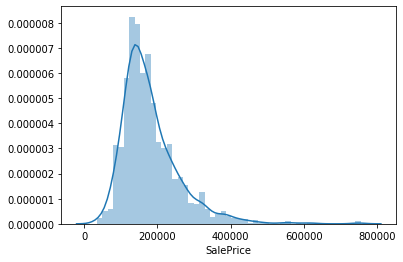

In [62]:
## SalePrice distribution: the mode is within range(100k and 150k) 
## with long tailed outlier, right skwed
sns.distplot(df['SalePrice'])

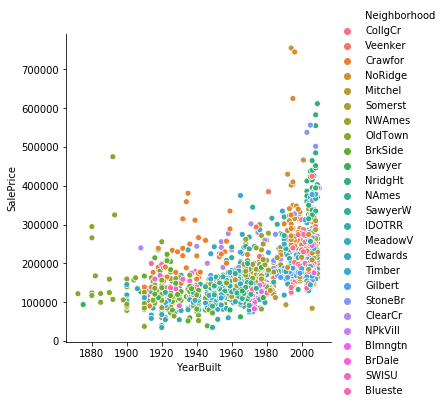

In [63]:
sns.relplot(x='YearBuilt',y='SalePrice',hue='Neighborhood',data=df)
## SalesPrice is on upward trend with YearBuilt, houses more valuable when built after 2000 & around hood such as: NoRidge(outlier),NridgHt,StoneBr

In [64]:
df[df.SalePrice>500000][['Neighborhood','SalePrice']].sort_values(by='SalePrice',ascending=False)

,Neighborhood,SalePrice
Id,,
692,NoRidge,755000
1183,NoRidge,745000
1170,NoRidge,625000
899,NridgHt,611657
804,NridgHt,582933
1047,StoneBr,556581
441,NridgHt,555000
770,StoneBr,538000
179,StoneBr,501837


Text(0.5, 1.0, 'YearBuilt vs SalePrice')

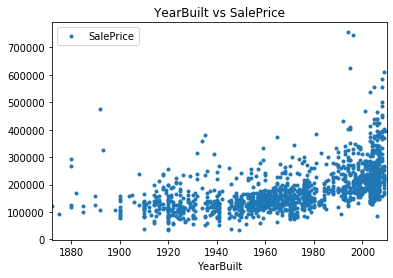

In [65]:
## linear relationship between YearBuilt and SalePrice
df.plot(x='YearBuilt',y='SalePrice',marker='.',linestyle='')
plt.title('YearBuilt vs SalePrice')

(array([1860., 1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 9 Text xticklabel objects>)

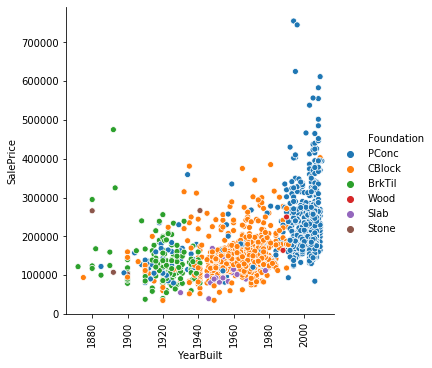

In [66]:
sns.relplot(x='YearBuilt',y='SalePrice',hue='Foundation',data=df)
plt.xticks(rotation =90)

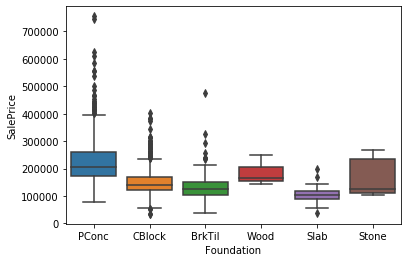

In [67]:
## Foundation: PConc based has highest avg. SalePrice, followed by Wood, Stone based has the widest range of price. 
sns.boxplot(x='Foundation',y='SalePrice',data=df)

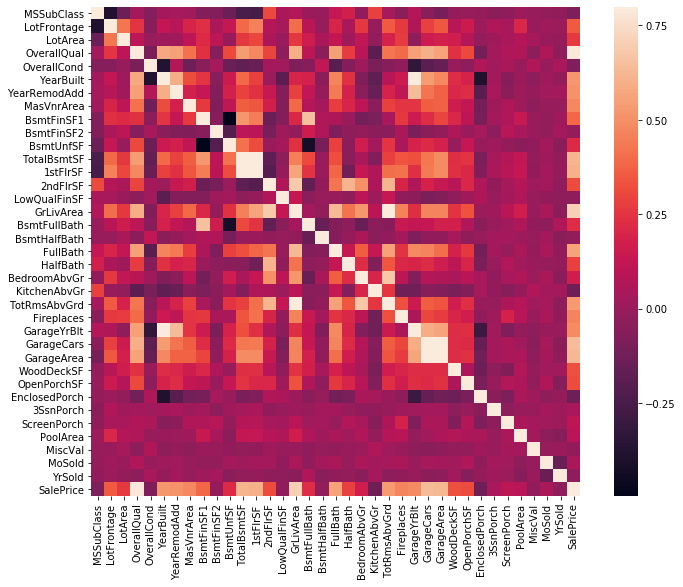

In [68]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

## Missing Data

In [69]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [70]:
# df=df.drop((missing_data[missing_data.total>1]).index,1)
df=df.drop(df.loc[df.Electrical.isnull()].index)


#### Standardise the data to normal distribution to set the threshold for outliars ( gaussian with 0 mean and unit variance of 1)

In [71]:
## StandardScaler trasfomration requries 2D array
scaled = StandardScaler().fit_transform(df.SalePrice[:,np.newaxis])

In [72]:
low_range= scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]

In [73]:
## Drop GrLivArea two outliers 
df = df.drop(df.loc[df.index.isin([1299,524])].index)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74240.99917988208, 180942.13864104328, 0.9320520365889887))

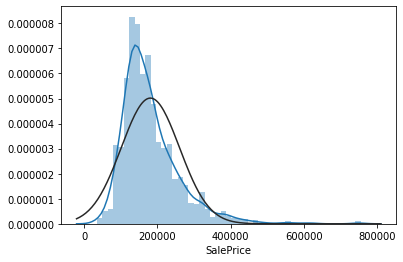

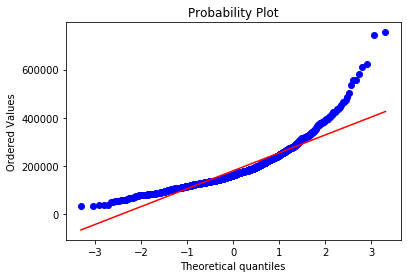

In [74]:
sns.distplot(df.SalePrice,fit=norm)
fig=plt.figure()
stats.probplot(df.SalePrice,plot=plt)

#### Log transform the data to have normal distribution plot for SalePrice

In [75]:
df.SalePrice= np.log(df.SalePrice)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3986736383757874, 12.024005414589174, 0.9954027633642688))

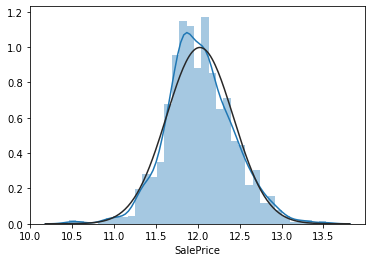

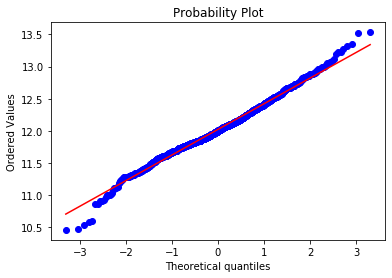

In [76]:
sns.distplot(df.SalePrice,fit=norm)
fig = plt.figure()
stats.probplot(df.SalePrice,plot=plt)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 3094, 3200, 3206])),
 (408.02329853970264, 1052.995881949211, 0.9821435933722064))

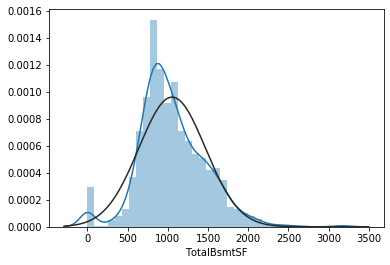

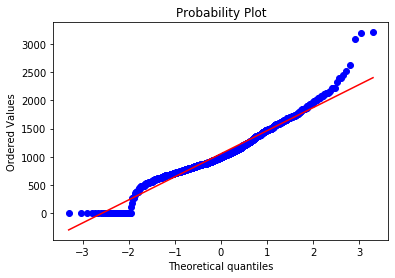

In [77]:
### Zero values for TotalBsmtSF, need to create binary variate and log tranform those non zero values
sns.distplot(df.TotalBsmtSF,fit=norm)
fig = plt.figure()
stats.probplot(df.TotalBsmtSF,plot=plt)

#### Create binary variable and transform the data for those non zero values using Log transforamtion

In [78]:
df['HasBsmt']=pd.Series(len(df.TotalBsmtSF),index=df.index)
df['HasBsmt']=0
df.loc[df.TotalBsmtSF>0,'HasBsmt']=1

In [79]:
df.loc[df.HasBsmt==1,'TotalBsmtSF']=np.log(df.TotalBsmtSF)

((array([-3.29734785, -3.03957662, -2.89619317, ...,  2.89619317,
          3.03957662,  3.29734785]),
  array([4.65396035, 5.24702407, 5.5759491 , ..., 8.03722003, 8.07090609,
         8.07277933])),
 (0.3538649722538122, 6.923661865160317, 0.9912372939608382))

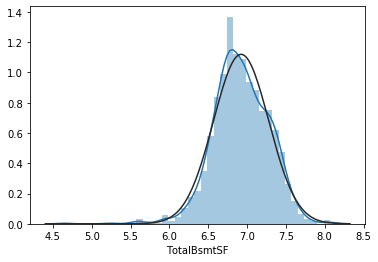

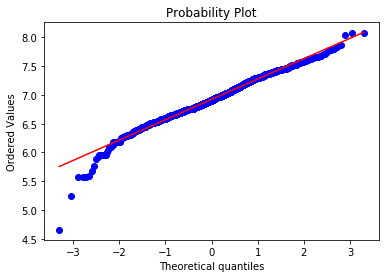

In [80]:
## Create prob plot and normal distribution plot
sns.distplot(df[df.TotalBsmtSF>0]['TotalBsmtSF'],fit=norm)
fig= plt.figure()
stats.probplot(df[df.TotalBsmtSF>0]['TotalBsmtSF'],plot=plt)

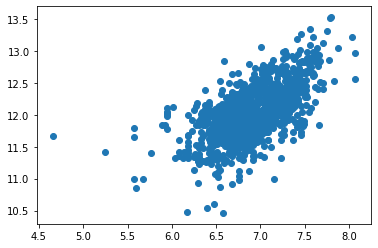

In [81]:
plt.scatter(df[df.TotalBsmtSF>0]['TotalBsmtSF'],df[df.TotalBsmtSF>0]['SalePrice'])

#### Dummy Variables convert categorical variables into dummy variables

In [82]:
pd.get_dummies(df).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## Regression Model

In [83]:
## OverallQual(0.79), GrLivArea(0.7),GarageCars(0.64),TotalBsmtSF(0.61)


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [85]:
X = df.GrLivArea.values.reshape(-1,1)
y = df.SalePrice.values.reshape(-1,1)

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
model.intercept_

array([11.16020683])

In [89]:
model.coef_

array([[0.00057136]])

In [90]:
y_pred=model.predict(X_test)

In [91]:
result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

Text(0.5, 1.0, 'Actual vs Predicted')

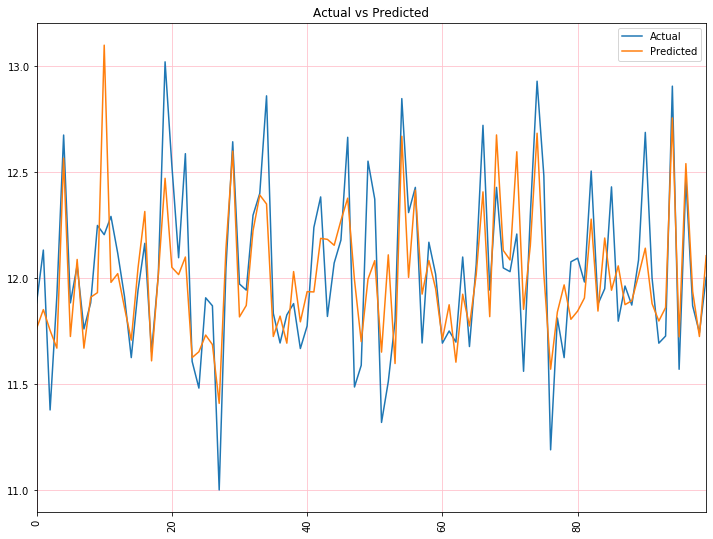

In [92]:
result1=result[:100]
result1.plot(kind='line',figsize=(12,9))
plt.grid(color='pink')
plt.xticks(rotation=90)
plt.title('Actual vs Predicted')

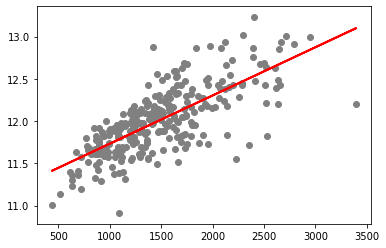

In [93]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)

In [94]:
### How to interpret the test accuracy result??? 
### 
print ('mean_absolute_error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error:',np.mean(metrics.mean_squared_error(y_test,y_pred)))

mean_absolute_error: 0.20350925680252985
mean_squared_error: 0.07104223916526187
Root_mean_squared_error: 0.07104223916526187


#### multivariate linear regression

In [95]:
X = df[['GrLivArea','OverallQual','GarageCars','TotalBsmtSF']].values
y = df.SalePrice.values

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [97]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred= model.predict(X_test)

In [99]:
result_multi = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [100]:
result_multi1 = result_multi.head(100)

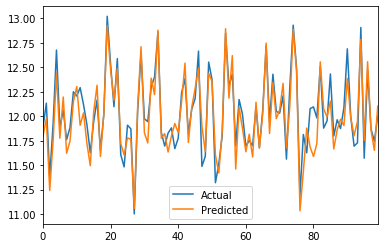

In [101]:
result_multi1.plot()

In [102]:
print ('mean_absolute_error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error:',np.mean(metrics.mean_squared_error(y_test,y_pred)))

mean_absolute_error: 0.13294619123561416
mean_squared_error: 0.02828811990013571
Root_mean_squared_error: 0.02828811990013571


## Advanced Linear Models

In [103]:
pd.concat([np.log1p(df.SalePrice),df.SalePrice],axis=1,keys=['log1p','log']).head(5)

,log1p,log
Id,,
1,2.583824,12.247694
2,2.573300,12.109011
3,2.589054,12.317167
4,2.553297,11.849398
5,2.597433,12.429216


In [104]:
df.SalePrice = np.log1p(df.SalePrice)

In [105]:
## Fillna values
df.loc[:,'Alley'] =df.loc[:,'Alley'].fillna('None')
df.loc[:,'PoolQC']=df.loc[:,'PoolQC'].fillna('No')
df.loc[:,'MiscFeature']=df.loc[:,'MiscFeature'].fillna('No')
df.loc[:,'Fence']=df.loc[:,'Fence'].fillna('No')
df.loc[:,'FireplaceQu']=df.loc[:,'FireplaceQu'].fillna('No')
df.loc[:,'LotFrontage']=df.loc[:,'LotFrontage'].fillna(0)
df.loc[:,'GarageType']=df.loc[:,'GarageType'].fillna('No')
df.loc[:,'GarageFinish']=df.loc[:,'GarageFinish'].fillna('No')
df.loc[:,'GarageQual']=df.loc[:,'GarageQual'].fillna('No')
df.loc[:,'GarageCond']=df.loc[:,'GarageCond'].fillna('No')
df.loc[:,'GarageYrBlt']=df.loc[:,'GarageYrBlt'].fillna(0)
df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")

In [106]:
df.replace({'MoSold':{1:'Jan',2:'Feb',3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}},inplace=True)

In [107]:
# Encode some categorical features as ordered numbers when there is information in the order
df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},inplace=True)
                

In [108]:
pd.DataFrame([df.corr().sort_values(by=['SalePrice'],ascending=False)['SalePrice']])

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,1stFlrSF,BsmtQual,FullBath,...,MiscVal,BsmtFinType2,OverallCond,LandSlope,YrSold,LowQualFinSF,MSSubClass,KitchenAbvGr,EnclosedPorch,LotShape
SalePrice,1.0,0.819349,0.721019,0.680562,0.677854,0.666821,0.654799,0.617036,0.615777,0.595157,...,-0.019927,-0.030237,-0.032143,-0.036743,-0.037784,-0.038451,-0.072489,-0.147207,-0.149832,-0.287769


### Features Engineering by simplification and combination of existing attributes

In [109]:
# Create new features
# 1* Simplifications of existing features
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [110]:
## Combinations of existing features 
df['OverallGrade']=df.OverallCond * df.OverallQual
df['GarageGrade'] = df.GarageCond * df.GarageQual
df['ExterGrade'] = df.ExterCond * df.ExterQual
df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
df["SimplOverallGrade"] = df["SimplOverallQual"] * df["SimplOverallCond"]
df["SimplExterGrade"] = df["SimplExterQual"] * df["SimplExterCond"]
df["SimplPoolScore"] = df["PoolArea"] * df["SimplPoolQC"]
df["SimplGarageScore"] = df["GarageArea"] * df["SimplGarageQual"]
df["SimplFireplaceScore"] = df["Fireplaces"] * df["SimplFireplaceQu"]
df["SimplKitchenScore"] = df["KitchenAbvGr"] * df["SimplKitchenQual"]

In [111]:
df['TotalBath']= df.BsmtFullBath + 0.5 * df.BsmtHalfBath + df.FullBath + 0.5*df.HalfBath
df['TotalSF']=df.GrLivArea + df.TotalBsmtSF
df['TotalFlrsSF'] = df['1stFlrSF']+df['2ndFlrSF']

In [112]:
df.corr().sort_values(by=['SalePrice'],ascending=False)['SalePrice']

SalePrice         1.000000
OverallQual       0.819349
TotalFlrsSF       0.731227
TotalSF           0.721562
GrLivArea         0.721019
                    ...   
SimplExterCond   -0.042448
MSSubClass       -0.072489
KitchenAbvGr     -0.147207
EnclosedPorch    -0.149832
LotShape         -0.287769
Name: SalePrice, Length: 86, dtype: float64

In [113]:
# 3* Polynomials on the top 10 existing features
df["OverallQual-s2"] = df["OverallQual"] ** 2
df["OverallQual-s3"] = df["OverallQual"] ** 3
df["OverallQual-Sq"] = np.sqrt(df["OverallQual"])
df["AllSF-2"] = df["TotalSF"] ** 2
df["AllSF-3"] = df["TotalSF"] ** 3
df["AllSF-Sq"] = np.sqrt(df["TotalSF"])
df["AllFlrsSF-2"] = df["TotalFlrsSF"] ** 2
df["AllFlrsSF-3"] = df["TotalFlrsSF"] ** 3
df["AllFlrsSF-Sq"] = np.sqrt(df["TotalFlrsSF"])
df["GrLivArea-2"] = df["GrLivArea"] ** 2
df["GrLivArea-3"] = df["GrLivArea"] ** 3
df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
df["SimplOverallQual-s2"] = df["SimplOverallQual"] ** 2
df["SimplOverallQual-s3"] = df["SimplOverallQual"] ** 3
df["SimplOverallQual-Sq"] = np.sqrt(df["SimplOverallQual"])
df["ExterQual-2"] = df["ExterQual"] ** 2
df["ExterQual-3"] = df["ExterQual"] ** 3
df["ExterQual-Sq"] = np.sqrt(df["ExterQual"])
df["GarageCars-2"] = df["GarageCars"] ** 2
df["GarageCars-3"] = df["GarageCars"] ** 3
df["GarageCars-Sq"] = np.sqrt(df["GarageCars"])
df["TotalBath-2"] = df["TotalBath"] ** 2
df["TotalBath-3"] = df["TotalBath"] ** 3
df["TotalBath-Sq"] = np.sqrt(df["TotalBath"])
df["KitchenQual-2"] = df["KitchenQual"] ** 2
df["KitchenQual-3"] = df["KitchenQual"] ** 3
df["KitchenQual-Sq"] = np.sqrt(df["KitchenQual"])
df["GarageScore-2"] = df["GarageScore"] ** 2
df["GarageScore-3"] = df["GarageScore"] ** 3
df["GarageScore-Sq"] = np.sqrt(df["GarageScore"])

#### Assign numerical & categorical features

In [114]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features.drop('SalePrice')
train_num = df[numerical_features]
train_cat = df[categorical_features]
train_num = train_num.fillna(train_num.median())

In [115]:
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import skew
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.metrics import mean_squared_error,make_scorer

In [116]:
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness)>0.5]
skewed_features= skewness.index
train_num[skewed_features] =np.log1p(train_num[skewed_features])

In [117]:
#### One-hot encoding through dummy features
train_cat = pd.get_dummies(train_cat)

#### Modelling

In [118]:
train = pd.concat([train_num,train_cat],axis=1)

In [119]:
y = df.SalePrice.values

In [120]:
### Partitioning the data
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=0)

In [121]:
X_train.loc[:,numerical_features]=StandardScaler().fit_transform(X_train.loc[:,numerical_features])
X_test.loc[:,numerical_features]=StandardScaler().fit_transform(X_test.loc[:,numerical_features])

In [122]:
scorer = make_scorer(mean_squared_error,greater_is_better=False)

In [123]:
def rmse_cv_train(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring=scorer,cv=10))
    return rmse
def rmse_cv_test(model):
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring=scorer,cv=10))
    return rmse

In [124]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
y_test_pred= lr.predict(X_test)

In [126]:
y_train_pred= lr.predict(X_train)

In [127]:
print('RMSE on Training data:',rmse_cv_train(lr).mean())
print('RMSE on test data:',rmse_cv_test(lr).mean())

RMSE on Training data: 5.948715643501356e-16
RMSE on test data: 6.833710639305068e-15


In [129]:
pd.DataFrame({'Predicted':y_test_pred,'Actual':y_test,'Residuals':y_test_pred-y_test}).head(10)

,Predicted,Actual,Residuals
0,2.556014,2.556024,-0.000010
1,2.575730,2.575166,0.000564
2,2.514836,2.516033,-0.001197
3,2.558667,2.558600,0.000067
4,2.617425,2.615648,0.001777
5,2.556014,2.556024,-0.000010
6,2.570032,2.569634,0.000398
7,2.546124,2.546421,-0.000297
8,2.556014,2.556024,-0.000010
9,2.584796,2.583968,0.000828


Text(0, 0.5, 'Actual Value')

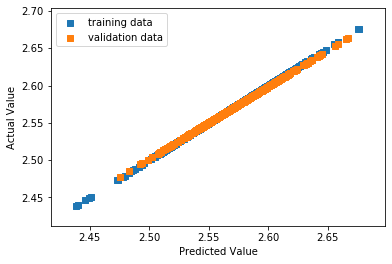

In [130]:
plt.scatter(y_train_pred,y_train,marker='s',label='training data')
plt.scatter(y_test_pred,y_test,marker='s',label='validation data')
plt.legend()
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

Text(0, 0.5, 'Residuals')

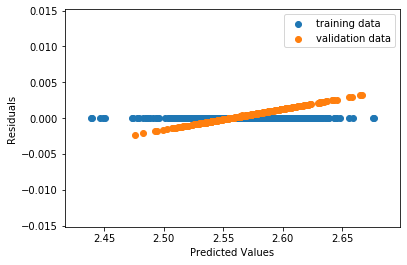

In [131]:
plt.scatter(y_train_pred,y_train_pred-y_train,label='training data')
plt.scatter(y_test_pred,y_test_pred-y_test,label='validation data')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
